In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [2]:
path=r"playstore.csv"
path=path.strip()
df=pd.read_csv(path)

In [3]:
 df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##### INFORMATION


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


##### COUNT,MEAN,STD,MIN - DATA DESCRIPTION

In [5]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1. DATA CLEANING 

a. Drop records where rating is missing since rating is our target/study variable

In [6]:
print(f"Missing Values :\n{df.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [7]:
df1=df.dropna(subset=['Rating'])

In [8]:
print(f"Missing Values :\n{df1.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


b. Check the null values for the Android Ver column.

i. Are all 3 records having the same problem?
ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
iii. Replace remaining missing values with the mode

In [9]:
print(f"Missing Values :\n{df1['Android Ver'].isnull().sum()}")

Missing Values :
3


In [10]:
#i
print (df1[df1.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

In [11]:
#ii
df2 = df1.drop(10472)
# Verification
verify = df2[df2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [12]:
#iii
df2['Android Ver'].fillna(df2['Android Ver'].mode()[0], inplace=True)


In [13]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


c. Current ver – replace with most common value

In [15]:
print(f"Missing Values :{df2['Current Ver'].isnull().sum()}")

Missing Values :4


# 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?
--> Reviews and installs need to be brought to numeric types.

In [17]:
df2['Reviews'] = df2['Reviews'].astype(int)
df2['Size'] = df2['Size'].astype(int)
df2['Last Updated'] = df2['Last Updated'].astype('datetime64[ns]')

b. Price variable – remove $ sign and convert to float

In [18]:
price = []
for i in df2['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)  

In [21]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [23]:
df2.drop(labels=df2[df2['Price']=='Everyone'].index, inplace = True)
df2['Price']= price
df2['Price']= df2['Price'].astype('float')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9362 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [25]:
install = []
for j in df2['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

df2['Installs']= install
df2['Installs']= df2['Installs'].astype('int')

In [27]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


d. Convert all other identified columns to numeric

In [28]:
df2['Reviews']= df2['Reviews'].astype('int')

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9362 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store.
    i. Are there any such records? Drop if so.

In [30]:
print(pd.unique(df2[['Rating']].values.ravel()))

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]


b. Reviews should not be more than installs as only those who installed can review the 
app.
   i. Are there any such records? Drop if so.

In [31]:
df3 = pd.DataFrame()
df3 = df2[df2.Reviews <= df2.Installs]
df3.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [32]:
df3.shape #gives rows and columns

(9359, 13)

# 4. Identify and handle outliers 

# a. Price column
  i. Make suitable plot to identify outliers in price
  
  
  ii. Do you expect apps on the play store to cost $200? Check out these cases
  
  iii. After dropping the useless records, make the suitable plot again to identify 
  outliers
  iv. Limit data to records with price < $30

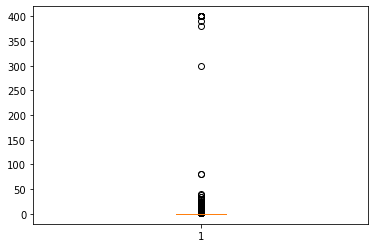

In [33]:
#i
plt.boxplot(df2['Price'])
plt.show()

In [34]:
#ii
print('Yes we can expect apps on the play store to cost $200')
df3.loc[df3['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


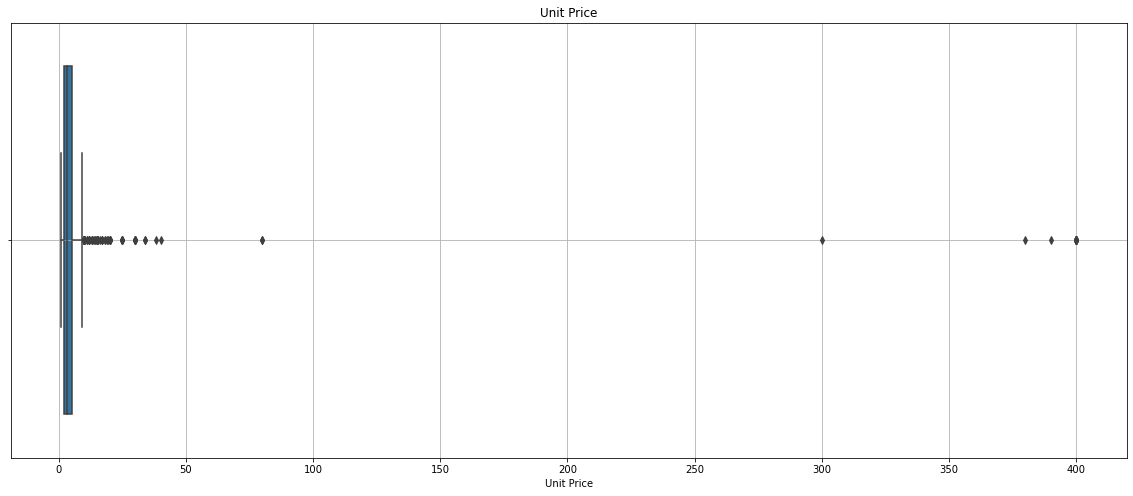

In [35]:
#iii
useful = df3[df3['Price'] != 0]
plt.subplots(figsize=(20,8))
sns.boxplot(useful.Price)
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

iv. Limit data to records with price < $30

In [36]:
less_30 = df3[df3['Price'] < 30]
less_30.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [37]:
less_30.shape

(9338, 13)

b. Reviews column
    i. Make suitable plot
   ii. Limit data to apps with < 1 Million reviews

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

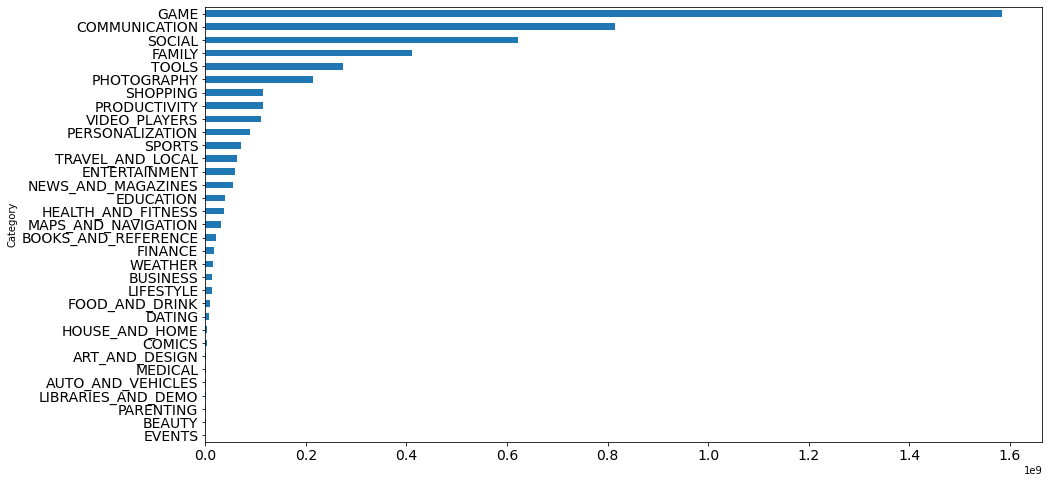

In [38]:
#1
total=df3.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

In [39]:
#ii
df_1m = df3[df3['Reviews'] < 1000000]
df_1m.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [40]:
df_1m.shape

(8655, 13)

In [41]:
rows = len(df_1m.axes[0])
cols = len(df_1m.axes[1])
cols_0=len(df3.axes[1])
print("no of current columns:",cols)
print("no of columns dropped:",cols_0-cols)

no of current columns: 13
no of columns dropped: 0


c. Installs
i. What is the 95th percentile of the installs?
ii. Drop records having a value more than the 95th percentile

In [42]:
#i
val = df3.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


In [43]:
x = df3.Installs.quantile() > val
print (x)

False


# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
   values?
   a. How do you explain this?
   b. What is the implication of this on your analysis?

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


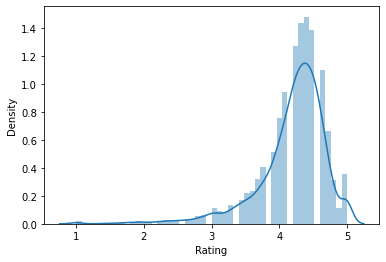

In [44]:
#a
sns.distplot(df3['Rating'])
plt.show()

In [45]:
df3['Rating'].mode()

0    4.4
dtype: float64

Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

# 6. What are the top Content Rating values?
   a. Are there any values with very few records?
   b. If yes, drop those as they won’t help in the analysis

In [46]:
#a.
df3['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [47]:
#b.
df3.drop(df3[df3['Content Rating']=="Unrated"].index , inplace=True)
df3.drop(df3[df3['Content Rating']=="Adults only 18+"].index ,inplace=True)
df3.groupby('Content Rating').count()

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,7414,7414,7414,7414,7414,7414,7414,7414,7414,7414,7410,7414
Everyone 10+,397,397,397,397,397,397,397,397,397,397,397,397
Mature 17+,461,461,461,461,461,461,461,461,461,461,461,461
Teen,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083


# 7. Effect of size on rating
   a. Make a joinplot to understand the effect of size on rating
   b. Do you see any patterns?
   c. How do you explain the pattern?

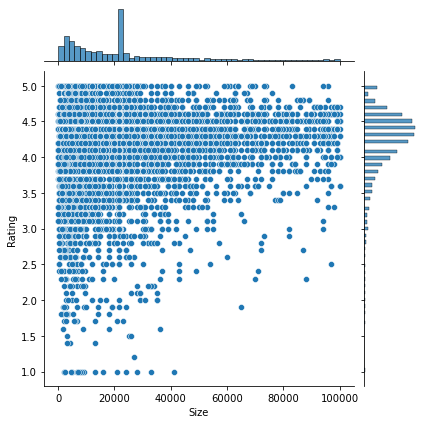

In [48]:
#a.
sns.jointplot(x ='Size', y='Rating', data = df3)
plt.show()

#b.
Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

#c. How do you explain the pattern?
Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating

# 8. Effect of price on rating
   a. Make a jointplot (with regression line)
   b. What pattern do you see?
   c. How do you explain the pattern?
   d. Replot the data, this time with only records with price > 0 
   e. Does the pattern change?
   f. What is your overall inference on the effect of price on the rating

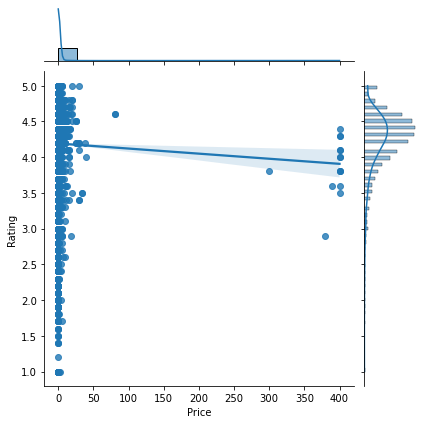

In [49]:
#a.
sns.jointplot(x='Price', y='Rating', data=df3, kind='reg')
plt.show()

#b What pattern do you see?
Generally on increasing the Price, Rating remains almost constant greater than 4.

#c. How do you explain the pattern?
Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price

In [50]:
df3.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068399,0.078885,0.051636,-0.021899
Reviews,0.068399,1.000000,0.125458,0.641600,-0.009826
Size,0.078885,0.125458,1.000000,0.075373,-0.025647
Installs,0.051636,0.641600,0.075373,1.000000,-0.011898
Price,-0.021899,-0.009826,-0.025647,-0.011898,1.000000


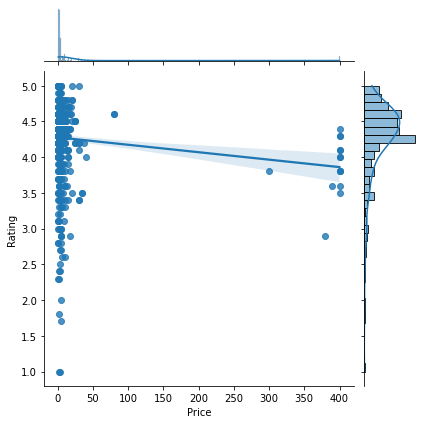

In [51]:
#d. Replot the data, this time with only records with price > 0
greaterthan_zero = df3[df3['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = greaterthan_zero, kind = "reg" )
plt.show()

In [52]:
#e. Does the pattern change?
#Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly 
#Negative Correlation between Price and Rating.
greaterthan_zero .corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.044118,0.116286,0.060133,-0.112165
Reviews,0.044118,1.000000,0.035570,0.867304,-0.015098
Size,0.116286,0.035570,1.000000,0.075056,-0.077510
Installs,0.060133,0.867304,0.075056,1.000000,-0.023623
Price,-0.112165,-0.015098,-0.077510,-0.023623,1.000000


#f. What is your overall inference on the effect of price on the rating
Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

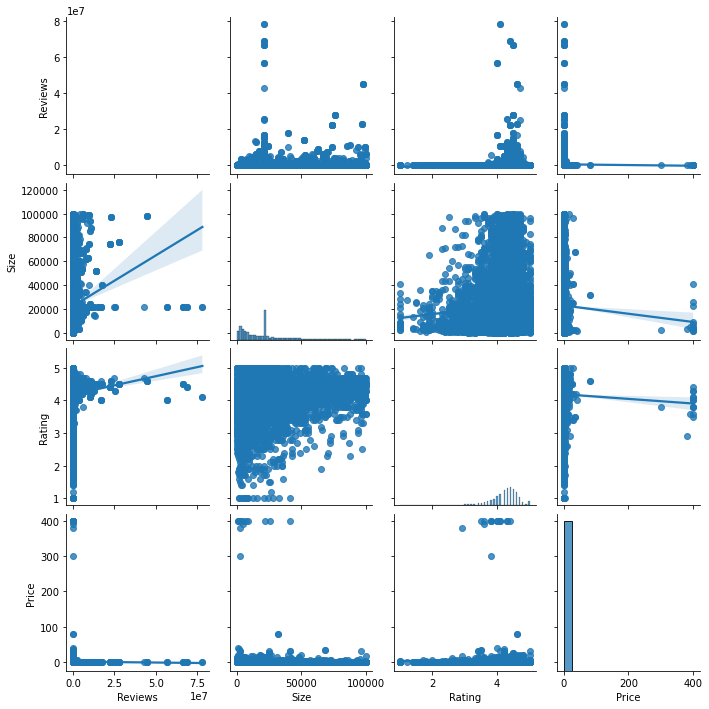

In [55]:
sns.pairplot(df3,vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# 10. Rating vs. content rating
   a. Make a bar plot displaying the rating for each content rating
   b. Which metric would you use? Mean? Median? Some other quantile?
   c. Choose the right metric and plot

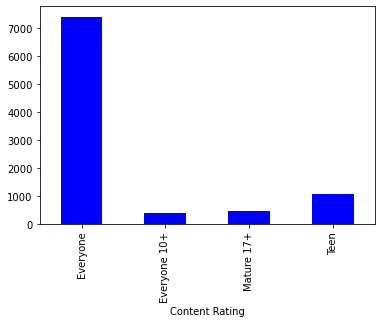

In [56]:
#a.
df3.groupby(['Content Rating'])['Rating'].count().plot.bar(color="blue")
plt.show()

#b. Which metric would you use? Mean? Median? Some other quantile?
We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

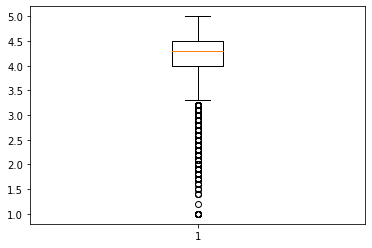

In [57]:
plt.boxplot(df3['Rating'])
plt.show()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

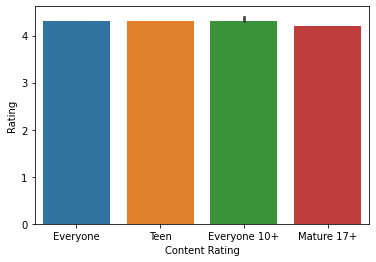

In [58]:
#c. Choose the right metric and plot

sns.barplot(y='Rating', x='Content Rating', data=df3 ,estimator=np.median)

# 11. Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size
b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination
c. Make a heatmap of this
i. Annotated
ii. Greens color map
d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


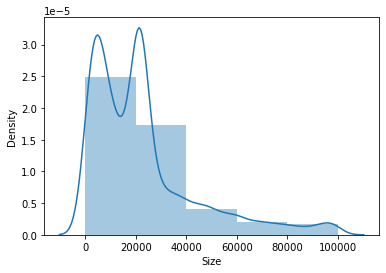

C:\Users\Dell\AppData\Local\Temp\ipykernel_11688\4003491701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Size_Buckets'] = pd.cut(df3['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116056,4.188889,3.951429,4.224490
LOW,4.161317,4.207143,4.129592,4.209655
MED,4.242463,4.262602,4.091975,4.205630
HIGH,4.179122,4.209375,4.168333,4.213158
VERY HIGH,4.208134,4.287805,4.197170,4.279603


In [59]:
#a
sns.distplot(df3["Size"], bins=5)
plt.show()
bins=[0, 4600, 12000, 21516, 32000, 100000]
df3['Size_Buckets'] = pd.cut(df3['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df3,values='Rating',index='Size_Buckets',columns='Content Rating')

In [60]:
#b
con_vs_size=pd.pivot_table(df3, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
con_vs_size

KeyError: 'Bucket Size'

In [ ]:
#c i)
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(con_vs_size, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

In [ ]:
#ii.Greens color map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(con_vs_size, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.